# Lista 6 - Juliana

# 1-  SIFT (Scale-Invariant Feature Transform)

In [106]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

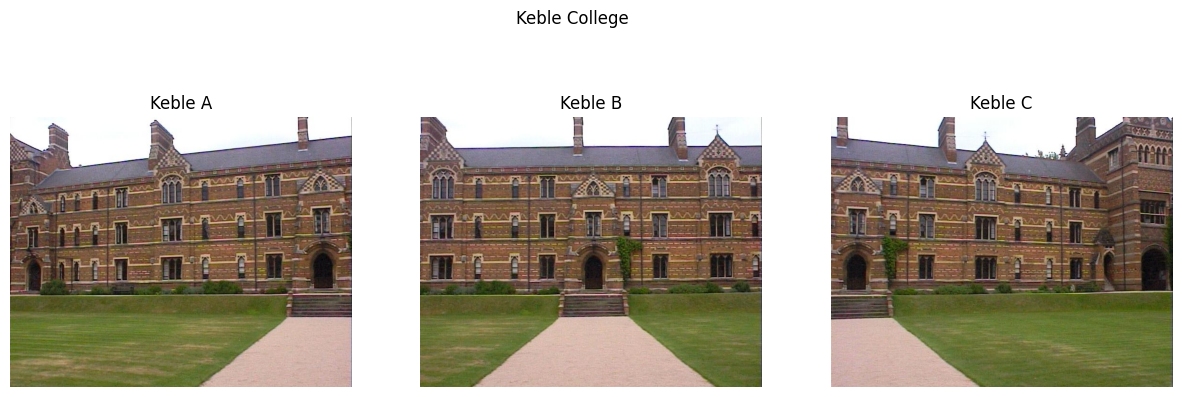

In [107]:
IMGS_PATH = ['keble_a.jpg', 'keble_b.jpg', 'keble_c.jpg']
IMGSS_RGB = [cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB) for img in IMGS_PATH]

# create fig axis
fig, ax = plt.subplots(1, len(IMGSS_RGB), figsize=(15, 5))
fig.suptitle('Keble College')

# plot images
for i, img in enumerate(IMGSS_RGB):
    ax[i].imshow(img)
    ax[i].set_title(f'Keble {chr(65+i)}')
    ax[i].axis('off')

plt.show()



# 1 & 2

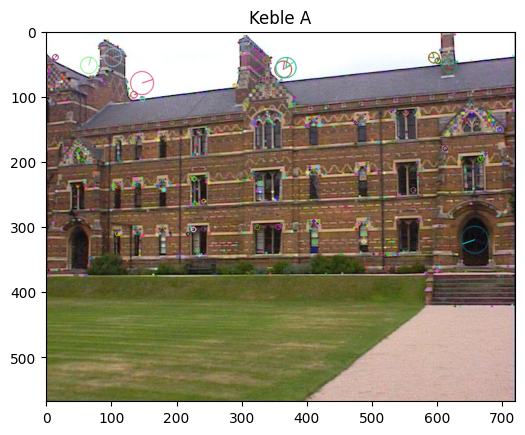

Keble A: 1001 keypoints found
Keble A: 1001 descriptors found


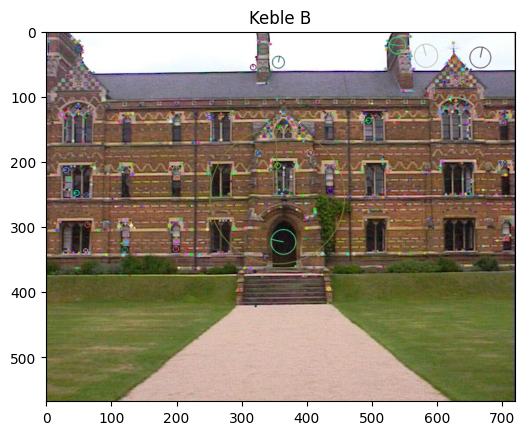

Keble B: 1000 keypoints found
Keble B: 1000 descriptors found


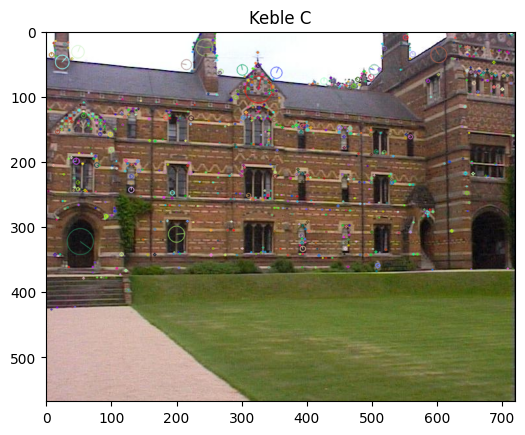

Keble C: 1001 keypoints found
Keble C: 1001 descriptors found


In [108]:
sift = cv.SIFT_create(nfeatures=1000)

descriptor_list = []
keypoints_list = []
for i, image in enumerate(IMGSS_RGB):
    img = image.copy()
    kp, des = sift.detectAndCompute(img,None)
    keypoints_list.append(kp)
    descriptor_list.append(des)
    img=cv.drawKeypoints(img,kp,img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img)
    plt.title(f'Keble {chr(65+i)}')
    plt.show()
    print(f'Keble {chr(65+i)}: {len(kp)} keypoints found')
    print(f'Keble {chr(65+i)}: {des.shape[0]} descriptors found')




In [109]:
print("Descriptors for Keble A")
print(descriptor_list[0].shape)
print("Descriptors for Keble B")
print(descriptor_list[1].shape)
print("Descriptors for Keble C")
print(descriptor_list[2].shape)

Descriptors for Keble A
(1001, 128)
Descriptors for Keble B
(1000, 128)
Descriptors for Keble C
(1001, 128)


# 3

In [110]:
image_chosen_idx = 2
image_chosen = IMGSS_RGB[image_chosen_idx]
interesting_kp_idx = 885

print(f'Keypoint {interesting_kp_idx} for Keble {chr(65+image_chosen_idx)}')
print(f"(x,y)=" + str(keypoints_list[image_chosen_idx][interesting_kp_idx].pt))
print(f"size=" + str(keypoints_list[image_chosen_idx][interesting_kp_idx].size))
print(f"angle=" + str(keypoints_list[image_chosen_idx][interesting_kp_idx].angle))
print(f"response=" + str(keypoints_list[image_chosen_idx][interesting_kp_idx].response))
print(f"octave=" + str(keypoints_list[image_chosen_idx][interesting_kp_idx].octave)) #quality of the keypoint



Keypoint 885 for Keble C
(x,y)=(166.65818786621094, 303.8763427734375)
size=3.54069447517395
angle=83.65469360351562
response=0.0337030366063118
octave=15664127


# 4

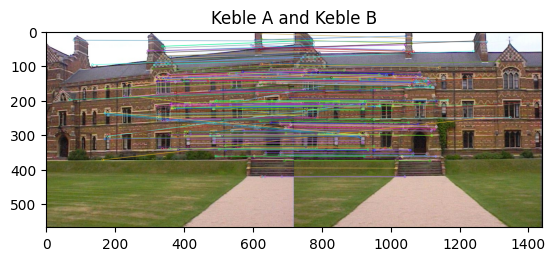

<Figure size 15000x3000 with 0 Axes>

In [111]:
matches = cv.FlannBasedMatcher(dict(algorithm=1, trees=5), dict()).knnMatch(descriptor_list[0], descriptor_list[1], k=2)
good = []
for m, n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

img_matches = cv.drawMatches(IMGSS_RGB[0], keypoints_list[0], IMGSS_RGB[1], keypoints_list[1], good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)
plt.title('Keble A and Keble B')
plt.figure(figsize=(150, 30))
plt.show()

# 5

In [112]:
source_points = np.float32([keypoints_list[0][m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
destination_points = np.float32([keypoints_list[1][m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
H, _ = cv.findHomography(source_points, destination_points, cv.RANSAC, 5.0)
print(H)

[[ 1.23136314e+00 -2.67683932e-02 -3.60746606e+02]
 [ 1.23435379e-01  1.16298523e+00 -6.18730421e+01]
 [ 3.18381493e-04  1.64479184e-06  1.00000000e+00]]


# 6

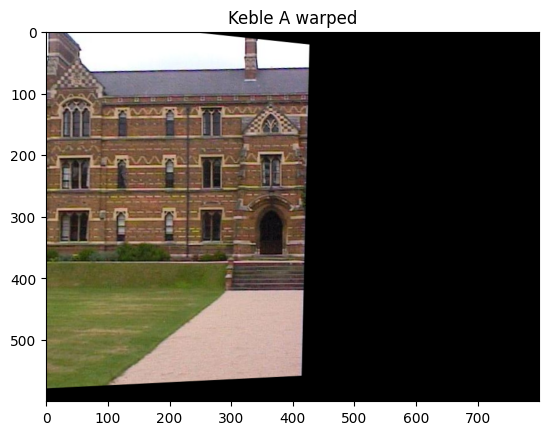

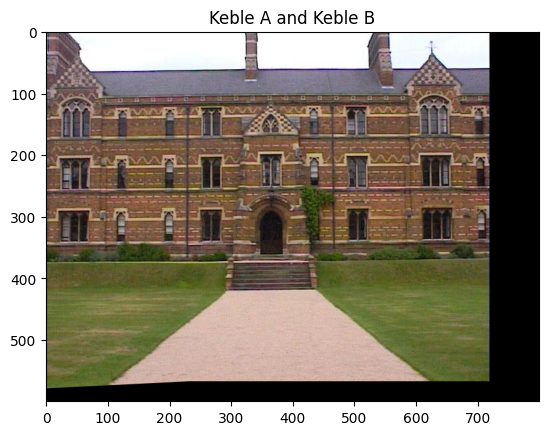

In [126]:
# applies H to the first image
size = (800, 600)
height, width, channels = IMGSS_RGB[0].shape
img_warped = cv.warpPerspective(IMGSS_RGB[0], H, size)
plt.imshow(img_warped)
plt.title('Keble A warped')
plt.show()
# overlay the second image
img_warped[0:height, 0:width] = IMGSS_RGB[1]
plt.imshow(img_warped)
plt.title('Keble A and Keble B')
plt.show()


# 2 Teórico


*1 Linearidade*

\begin{align*}
a \hat{I}_1(t) + b \hat{I}_2(t) &= a L_1(I,t) + b L_2(I,t) \\
&= a g_1(t) \ast I_1 + b g_2(t) \ast I_2 \\
&= a g_1(t) \ast I_1 (x,y) + b g_2(t) \ast I_2 (x,y)\\
&= a \hat{I}_1(x,y,t) + b \hat{I}_2(x,y,t) \\
&= a\int \int_{\mathbb{R}^2} g_1(x,y,t) I_1(s-x, r-y) ds dr + b\int \int_{\mathbb{R}^2} g_2(x,y,t) I_2(s-x, r-y) ds dr \\
&= \int \int_{\mathbb{R}^2} a g_1(x,y,t) I_1(s-x, r-y) + b g_2(x,y,t) I_2(s-x, r-y) ds dr \\
&= \int \int_{\mathbb{R}^2} \frac{1}{2\pi t}e^{-\frac{x^2 + y^2}{2t}} (aI_1(s-x, r-y) + bI_2(s-x, r-y)) ds dr \\
&= g(t) \ast (aI_1 + bI_2) \\	
&= L(aI_1 + bI_2, t) \\
\end{align*}

**2** Invariância por translação.

\begin{align*}
\hat{I}(x-\Delta x, y - \Delta y, t) &= \int \int_{\mathbb{R}^2} g(x-\Delta x, y - \Delta y, t) I(s-x+\Delta x, r-y+\Delta y) ds dr \\
\end{align*}

Por outro lado, como  $\hat{I}(x,y,t) = (g(t) \ast I)(x,y)$, temos que:

<!-- \begin{align*}
\hat{I}(x-\Delta x, y - \Delta y, t) &= (g(t) \ast I)(x-\Dlta x, y - \Delta y) \\
\end{align*} -->

\begin{align*}L(I(x-\Delta x, y - \Delta y), t) &= g(t) \ast I \\
& = g(t) \ast L(I,0) \\
& = \int \int_{\mathbb{R}^2} g(x,y,t) I(s-x, r-y) ds dr \\
& = \int \int_{\mathbb{R}^2} g(x-\Delta x, y - \Delta y, t) I(s-x+\Delta x, r-y+\Delta y) ds dr \end{align*}. 

Portanto, a invariância por translação é garantida.

**3 - Propriedade de semigrupo**

\begin{align*}
L(I, t+s) &=L(L(I,t),s) \\
\end{align*}

Demonstração:

\begin{align*}
L(I, t+s) &= g(t+s) \ast I \\
&= g(s) \ast g(t) \ast I \\
&= g(s) \ast (g(t) \ast I) \\
&= g(s) \ast L(I,t) \\
&= L(L(I,t),s) \\
\end{align*}

O segundo passo foi possível pois $g(t+s)=\frac{1}{2\pi(t+s)}e^{-\frac{x^2 + y^2}{2(t+s)}} = g(s) \ast g(t)$.

**4 Não ampliação dee máximos e mínimos espaciais**

(a) $\partial_t \hat{I}(x_*, y_*) \leq 0$ se $(x_*, y_*)$ é um ponto de máximo.

(b) $\partial_t \hat{I}(x_*, y_*) \geq 0$ se $(x_*, y_*)$ é um ponto de mínimo.

Demonstração:

(a) Se $(x_*, y_*)$ é um ponto de máximo, então o $I_{xx} < 0$ e $I_{yy} < 0$ em $(x_*, y_*)$. 

Assim, como

 $\hat{I}_t(x_, y_, t) = \hat{I}_{xx}(x,y,t) + \hat{I}_{yy}(x,y,t)$ 
 
 com $\hat{I}(x,y,0)=I(x,y)$

 então: 
$I_t(x_*, y_*, t) = I_{xx}(x_*, y_*, t) + I_{yy}(x_*, y_*, t) < 0$

(b) Se $(x_*, y_*)$ é um ponto de mínimo, então o $I_{xx} > 0$ e $I_{yy} > 0$ em $(x_*, y_*)$.

Assim, como

 $\hat{I}_t(x_, y_, t) = \hat{I}_{xx}(x,y,t) + \hat{I}_{yy}(x,y,t)$ 
 
 com $\hat{I}(x,y,0)=I(x,y)$

 então:

$I_t(x_*, y_*, t) = I_{xx}(x_*, y_*, t) + I_{yy}(x_*, y_*, t) > 0$


**5 - Invariante por rotação**

O espaço de escala de uma imagem rotacionada é a rotação do espaço de escala da imagem original.
Isto é, se $I(x,y)$ é uma imagem e $I_R(x,y)$ é a imagem rotacionada de $I(x,y)$, então $\hat{I}_R(x,y,t) = \hat{I}(x,y,t)$.


Isso se traduz na seguinte equação:

\begin{align*}
\exists h \text{ tal que } h(x^2+y^2, t)=g(x,y,t)
\end{align*}

Por definição, temos que $g(x,y,t)=\frac{1}{2\pi t}e^{-\frac{x^2 + y^2}{2t}}$, portanto, o $h$ existe e $h(x^2+y^2, t)=\frac{1}{2\pi t}e^{-\frac{x^2 + y^2}{2t}}$.